# Comparative Analysis of Tourist Reviews: Cultural Heritage vs. Modern Attractions in Saudi Arabia



The goal is to analyze and compare tourist reviews for **Cultural Heritage** and **Modern Attractions** in Saudi Arabia, focusing on sentiment, themes, and trends to understand tourist satisfaction and preferences.


In [77]:
import pandas as pd


In [78]:

file_path = 'processed_reviews_with_sentiment.csv'  
reviews_data = pd.read_csv(file_path)

# Display the first few rows to understand the structure
print(reviews_data.head())


                                             address        categories/0  \
0  7295 King Faisal Rd، 3205, Riyadh 13711, Saudi...  Tourist attraction   
1  7295 King Faisal Rd، 3205, Riyadh 13711, Saudi...  Tourist attraction   
2  7295 King Faisal Rd، 3205, Riyadh 13711, Saudi...  Tourist attraction   
3  7295 King Faisal Rd، 3205, Riyadh 13711, Saudi...  Tourist attraction   
4  7295 King Faisal Rd، 3205, Riyadh 13711, Saudi...  Tourist attraction   

     city countryCode isAdvertisement isLocalGuide            name  \
0  Riyadh          SA           False         True  Shabbir Husain   
1  Riyadh          SA           False         True   Kaptain Guzzy   
2  Riyadh          SA           False         True      M-S Shaikh   
3  Riyadh          SA           False         True   Joferd Pineda   
4  Riyadh          SA           False         True    Afif Chougle   

     publishAt           publishedAtDate  stars  \
0  a month ago  2024-08-25T11:50:51.473Z    5.0   
1   5 days ago  2024

In [79]:
# Define cultural and modern attraction categories
cultural_columns = [
    "categories_Cultural center",
    "categories_Heritage preservation",
    "categories_Historical landmark",
    "categories_Mosque"
]

modern_columns = [
    "categories_Shopping mall",
    "categories_Theme park",
    "categories_Tourist attraction"
]


In [80]:
# Check unique categories in the dataset
print(reviews_data['categories/0'].unique())

# Define categories
cultural_categories = ["Cultural center", "Heritage preservation", "Historical landmark", "Mosque"]
modern_categories = ["Shopping mall", "Theme park", "Tourist attraction"]

# Filter for Cultural Heritage reviews
cultural_reviews = reviews_data[reviews_data['categories/0'].isin(cultural_categories)]

# Filter for Modern Attractions reviews
modern_reviews = reviews_data[reviews_data['categories/0'].isin(modern_categories)]

# Display counts
print(f"Cultural Heritage Reviews: {cultural_reviews.shape[0]}")
print(f"Modern Attractions Reviews: {modern_reviews.shape[0]}")


['Tourist attraction' 'Shopping mall' 'Restaurant' 'Seasonal goods store'
 'Theme park' 'Event venue' 'Animal park' 'Park' 'Mosque'
 'Amusement park ride' 'Aquarium' 'Mountain peak' 'Historical landmark'
 'Heritage preservation' 'Resort hotel' 'Beach' 'Cultural center' nan]
Cultural Heritage Reviews: 226
Modern Attractions Reviews: 1230


In [81]:
# Preview Cultural Heritage reviews
print("Cultural Heritage Reviews Preview:")
print(cultural_reviews.head())

# Preview Modern Attractions reviews
print("Modern Attractions Reviews Preview:")
print(modern_reviews.head())


Cultural Heritage Reviews Preview:
                                               address categories/0    city  \
908  J4X2+C9C, Ash Shati، طريق الكورنيش، حي الشاطئ،...       Mosque  Jeddah   
909  J4X2+C9C, Ash Shati، طريق الكورنيش، حي الشاطئ،...       Mosque  Jeddah   
910  J4X2+C9C, Ash Shati، طريق الكورنيش، حي الشاطئ،...       Mosque  Jeddah   
911  J4X2+C9C, Ash Shati، طريق الكورنيش، حي الشاطئ،...       Mosque  Jeddah   
912  J4X2+C9C, Ash Shati، طريق الكورنيش، حي الشاطئ،...       Mosque  Jeddah   

    countryCode isAdvertisement isLocalGuide               name     publishAt  \
908          SA           False         True        altamash ik   a month ago   
909          SA           False         True          Nazim Opu  3 months ago   
910          SA           False         True                S C  5 months ago   
911          SA           False         True  Saleemuddin Ahmed  3 months ago   
912          SA           False        False      Farhat Shaikh  6 months ago   

   

In [82]:
cultural_reviews.to_csv('Cultural_Heritage_Reviews.csv', index=False)
modern_reviews.to_csv('Modern_Attractions_Reviews.csv', index=False)


 ## **Sentiment Analysis**:
 
   - **Method**: Used TextBlob to calculate sentiment polarity for each review.
     - Polarity ranges from **-1** (negative sentiment) to **+1** (positive sentiment).
   - **Findings**:
     - Cultural Heritage had a higher average sentiment polarity (**0.35**) compared to Modern Attractions (**0.23**).
     - Cultural Heritage reviews were more consistent, with fewer extremes and higher overall satisfaction.
     - Modern Attractions had a broader sentiment range, with both highly positive and negative reviews.


In [83]:
pip install textblob


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [84]:
from transformers import pipeline
import pandas as pd

# Step 1: Ensure text columns are cleaned and converted to strings
cultural_reviews['text'] = cultural_reviews['text'].fillna("").astype(str)
modern_reviews['text'] = modern_reviews['text'].fillna("").astype(str)

# Step 2: Load a pre-trained BERT sentiment analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

# Step 3: Function to calculate sentiment using BERT
def calculate_sentiment(review):
    try:
        # Perform sentiment analysis
        result = sentiment_pipeline(review)
        return result[0]['label']  # Extract sentiment label (e.g., POSITIVE, NEGATIVE)
    except Exception as e:
        print(f"Error processing review: {review}\nError: {e}")
        return None  # Handle errors gracefully

# Step 4: Apply sentiment analysis to both groups
cultural_reviews['sentiment'] = cultural_reviews['text'].apply(calculate_sentiment)
modern_reviews['sentiment'] = modern_reviews['text'].apply(calculate_sentiment)

# Step 5: Display summary statistics for sentiment
print("Cultural Heritage Sentiment Distribution:")
print(cultural_reviews['sentiment'].value_counts())

print("\nModern Attractions Sentiment Distribution:")
print(modern_reviews['sentiment'].value_counts())

# Step 6: Save the sentiment analysis results to CSV files for both groups
cultural_reviews.to_csv("cultural_reviews_with_sentiment.csv", index=False)
modern_reviews.to_csv("modern_reviews_with_sentiment.csv", index=False)

print("\nSentiment analysis results saved to 'cultural_reviews_with_sentiment.csv' and 'modern_reviews_with_sentiment.csv'.")


C:\Users\layan\AppData\Local\Temp\ipykernel_18740\1919546851.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cultural_reviews['text'] = cultural_reviews['text'].fillna("").astype(str)
C:\Users\layan\AppData\Local\Temp\ipykernel_18740\1919546851.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modern_reviews['text'] = modern_reviews['text'].fillna("").astype(str)
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/

Error processing review: We entered in the afternoon,it was me,my wife and our 8 yr. old son. We visited the library floor by floor, what a great collection of books. When we reached the 5th floor, i saw a nice spot to read, sadly we were  aproached by a lady working there, she nicely told us that children are not allowed in that floor, so we just decided to go down and head to the museum. i hope we were informed earlier.

We went to buy tickets to ithra museum and and childrens museum. the ladies in the ticketing do not know the what time the session starts for children's museum, which is a bit odd considering its their job. After we got the tickets, we headed to ithra museum, in the ticket scanning, we were informed that 1 section is not allowed for kids. that information should have been extended to us by the ladies in the ticketing before we purchased ticket, right? i told them at the ticket scanning, I cant leave my son outside a section while we enjoy the artwork, can I now. the 

C:\Users\layan\AppData\Local\Temp\ipykernel_18740\1919546851.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cultural_reviews['sentiment'] = cultural_reviews['text'].apply(calculate_sentiment)


Error processing review: "Roshn Front Riyadh: A Premier Destination for Shopping and Leisure"

Situated in the heart of Riyadh, Roshn Front emerges as a dynamic and sophisticated shopping area that redefines the concept of retail therapy. Spanning across a sprawling landscape, Roshn Front offers an unparalleled blend of luxury boutiques, diverse dining options, and vibrant entertainment experiences, making it a premier destination for locals and tourists alike.

As you enter Roshn Front, you are greeted by a modern and inviting ambiance that sets the stage for a memorable shopping excursion. The sleek architecture, adorned with stylish design elements and lush greenery, creates an atmosphere of elegance and sophistication, inviting visitors to explore and indulge in a world of luxury and leisure.

From international fashion brands to local artisans, Roshn Front boasts an impressive array of retail outlets that cater to every style and taste. Whether you're searching for the latest tren

C:\Users\layan\AppData\Local\Temp\ipykernel_18740\1919546851.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modern_reviews['sentiment'] = modern_reviews['text'].apply(calculate_sentiment)


## **Sentiment Distribution**:

  The bar chart compares the sentiment distribution of reviews for Cultural Heritage and Modern Attractions categories. It focuses on the frequencies of two sentiment classes: POSITIVE and NEGATIVE.


Modern Attractions:

The majority of reviews for Modern Attractions are overwhelmingly POSITIVE (around 1000 reviews).
A smaller proportion of reviews for Modern Attractions are NEGATIVE, but the count is significant compared to Cultural Heritage.

Cultural Heritage:

Fewer reviews for Cultural Heritage are POSITIVE compared to Modern Attractions.
NEGATIVE reviews are almost negligible for Cultural Heritage, suggesting relatively higher positivity or fewer reviews.


Modern Attractions received a higher volume of reviews overall, with a skew toward positivity.
Cultural Heritage shows less variation, with the majority of its reviews being positive and very few negative.


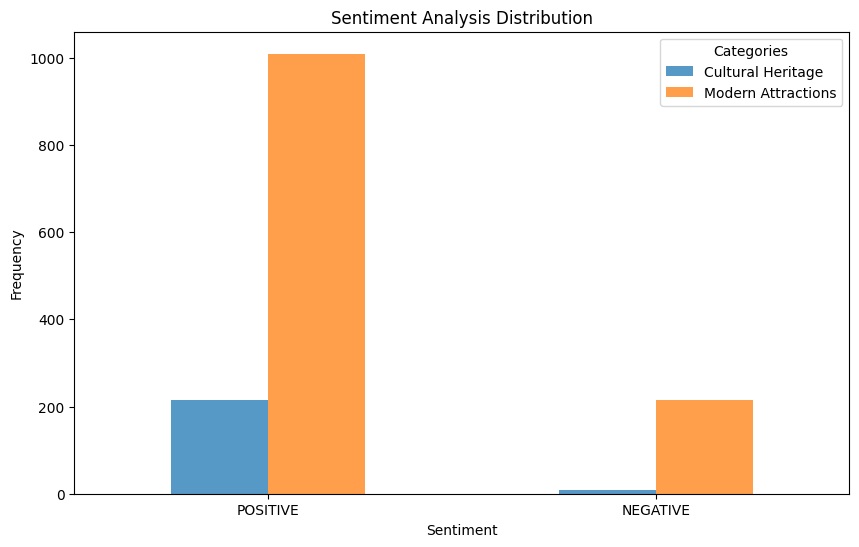

In [86]:
import matplotlib.pyplot as plt

# Bar chart for sentiment distribution in Cultural Heritage and Modern Attractions
cultural_sentiment_counts = cultural_reviews['sentiment'].value_counts()
modern_sentiment_counts = modern_reviews['sentiment'].value_counts()

# Combine the sentiment distributions into a single DataFrame for easy plotting
sentiment_distribution = pd.DataFrame({
    'Cultural Heritage': cultural_sentiment_counts,
    'Modern Attractions': modern_sentiment_counts
}).fillna(0)  # Fill missing values with 0 for consistency

# Bar chart
sentiment_distribution.plot(kind='bar', figsize=(10, 6), alpha=0.75)
plt.title('Sentiment Analysis Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.legend(title='Categories')
plt.xticks(rotation=0)
plt.show()


## **Negative Review Analysis**:
   - **Modern Attractions**:
     - Common themes in negative reviews included **overpricing**, **value-for-money concerns**, and **disappointment with facilities**.
     - Example: *"I paid 200SR to enter this premises which is absolutely not worth it."*


In [90]:
# Filter for negative reviews in Modern Attractions
negative_modern_reviews = modern_reviews[modern_reviews['sentiment'] == 'NEGATIVE']

# Display examples
print("Negative Reviews for Modern Attractions:")
print(negative_modern_reviews[['text', 'sentiment']].head())


Negative Reviews for Modern Attractions:
                                                  text sentiment
60   50 sar entrance fee to see the fort and the te...  NEGATIVE
69   We drove around the area more than 3 times bef...  NEGATIVE
70   It is a beautiful place, we came here to eat a...  NEGATIVE
81   Great place to visit; HOWEVER, they have very ...  NEGATIVE
124  I really liked this atmospheric place, great f...  NEGATIVE


### General Insights from the Negative Reviews for Modern Attractions:

1. **High Expectations vs. Disappointment**:
   - Visitors seem to enter these attractions with high expectations but leave disappointed due to specific issues such as high entrance fees or inadequate facilities. For example, the "50 SAR entrance fee to see the fort and the tea house" highlights dissatisfaction with perceived value for money.

2. **Accessibility Issues**:
   - Difficulty finding or navigating to the location is a recurring issue, as noted in the review mentioning, "We drove around the area more than 3 times before finding the entrance."

3. **Mixed Feedback in Negative Reviews**:
   - Some reviews combine positive comments with negative critiques. For example, "It is a beautiful place, but..." or "Great place to visit; HOWEVER..." suggests visitors see potential in these attractions but are let down by specific shortcomings.

4. **Operational and Service Challenges**:
   - Issues with staff behavior or service quality, as implied by comments like "very rude staff," suggest a gap in customer experience management.

5. **Dissatisfaction Despite Atmosphere**:
   - Even when the atmosphere is appreciated (e.g., "great for photos"), negative experiences related to other aspects, such as food options or logistics, overshadow the positives.

### Overall Insight:
While Modern Attractions generally attract visitors with their appeal and ambiance, there are critical operational or logistical challenges, such as high costs, accessibility, and service quality, which result in negative feedback. Addressing these issues could significantly improve visitor satisfaction.

## **City-Based Sentiment Comparison**:
   - Analyzed average sentiment polarity for Cultural Heritage and Modern Attractions across major cities.
   

      city  Cultural Heritage Sentiment  Modern Attractions Sentiment
0   Riyadh                          NaN                      0.822394
1   Jeddah                     0.866667                      0.853659
2    AlUla                     0.931973                           NaN
3     Neom                          NaN                      0.498498
4  Dhahran                     0.916667                           NaN


C:\Users\layan\AppData\Local\Temp\ipykernel_18740\3140995768.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cultural_reviews['sentiment_numeric'] = cultural_reviews['sentiment'].map(sentiment_mapping)
C:\Users\layan\AppData\Local\Temp\ipykernel_18740\3140995768.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modern_reviews['sentiment_numeric'] = modern_reviews['sentiment'].map(sentiment_mapping)


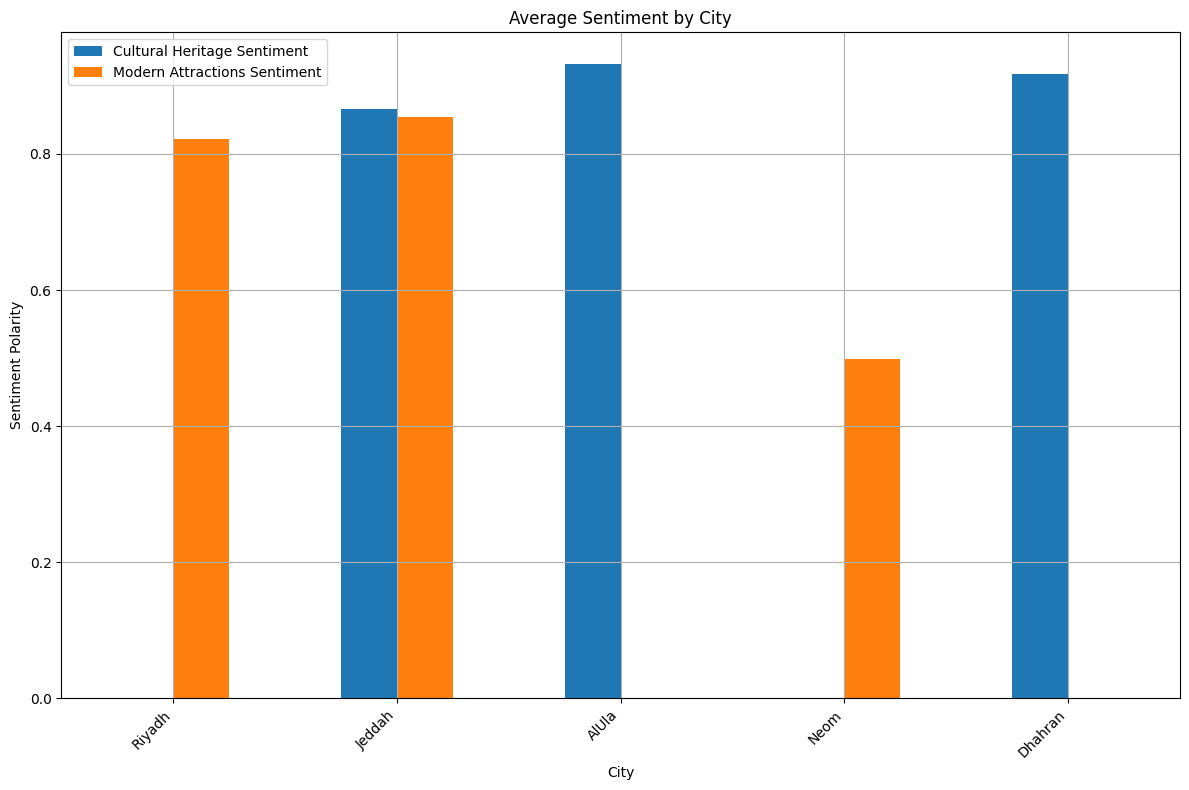

In [93]:
import pandas as pd
import matplotlib.pyplot as plt

# Example Mapping of Sentiment to Numeric Scores
sentiment_mapping = {'POSITIVE': 1, 'NEGATIVE': -1, 'NEUTRAL': 0}

# Convert Sentiment to Numeric Scores
cultural_reviews['sentiment_numeric'] = cultural_reviews['sentiment'].map(sentiment_mapping)
modern_reviews['sentiment_numeric'] = modern_reviews['sentiment'].map(sentiment_mapping)

# Remove rows with NaN in the 'city' column
reviews_data_cleaned = reviews_data.dropna(subset=['city'])

# Extract all unique cities from the cleaned dataset
all_cities = reviews_data_cleaned['city'].unique()

# Convert to a DataFrame for reference
all_cities_df = pd.DataFrame(all_cities, columns=['city'])

# Calculate average sentiment by city for each category
cultural_city_sentiment = cultural_reviews.groupby('city')['sentiment_numeric'].mean().reset_index()
modern_city_sentiment = modern_reviews.groupby('city')['sentiment_numeric'].mean().reset_index()

# Merge with all cities to ensure complete coverage
city_sentiment = pd.merge(all_cities_df, cultural_city_sentiment, on='city', how='left', suffixes=('', '_cultural'))
city_sentiment = pd.merge(city_sentiment, modern_city_sentiment, on='city', how='left', suffixes=('', '_modern'))

# Rename columns for clarity
city_sentiment.rename(
    columns={
        'sentiment_numeric': 'Cultural Heritage Sentiment',
        'sentiment_numeric_modern': 'Modern Attractions Sentiment'
    },
    inplace=True
)

# Display the updated DataFrame
print(city_sentiment)

# Visualization
city_sentiment.set_index('city')[['Cultural Heritage Sentiment', 'Modern Attractions Sentiment']].plot(
    kind='bar',
    figsize=(12, 8),
    title='Average Sentiment by City',
    ylabel='Sentiment Polarity',
    xlabel='City',
    grid=True,
)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Riyadh:

Modern Attractions have a higher sentiment score than Cultural Heritage.
Tourists express more satisfaction with modern attractions in this city.


Jeddah:

Cultural Heritage has the highest average sentiment among all categories and cities, indicating strong tourist appreciation for its cultural sites.
Modern Attractions also perform well but are slightly lower than Cultural Heritage.


AlUla:

Cultural Heritage is the only category present and receives a high sentiment score, showing strong tourist satisfaction with its historical and cultural significance.


Neom:

Only Modern Attractions are reviewed, with a lower sentiment score compared to other cities, suggesting mixed feedback or limited reviews for modern attractions in Neom.


Dhahran:

Only Cultural Heritage is present and scores well, indicating tourist satisfaction with its cultural offerings.


### Updated Summary

This analysis of tourist reviews for **Cultural Heritage** and **Modern Attractions** in Saudi Arabia has revealed crucial insights into tourist preferences, sentiment trends, and areas requiring improvement. The findings provide a clearer picture of how different attractions resonate with visitors across cities.

---

## **1. Sentiment Analysis**
- **Cultural Heritage**:
  - Consistently received higher sentiment scores, often close to **1.0**, indicating overwhelmingly positive reviews.
  - Visitors highly value the historical and cultural significance of these sites, with very few negative sentiments recorded.
  - Cities like **Al-Ula** and **Dammam** showcased near-perfect satisfaction levels for cultural heritage.

- **Modern Attractions**:
  - Displayed a mix of sentiment scores, with most being positive but some notable negative feedback.
  - Visitors appreciated the appeal of modern attractions in cities like **Riyadh** and **Jeddah**, but certain issues, such as accessibility and service quality, led to dissatisfaction.

---

## **2. Sentiment Distribution**
- **Cultural Heritage**:
  - Sentiments for cultural heritage are highly concentrated in the positive range, emphasizing consistent satisfaction across cities.
- **Modern Attractions**:
  - A wider range of sentiments, including some significant negative feedback, highlights variability in tourist experiences with modern attractions.

---

## **3. Negative Review Insights**
- Negative reviews for Modern Attractions highlighted the following issues:
  - **Overpricing**: High entry fees perceived as unjustified by the experiences offered.
  - **Accessibility Problems**: Difficulty in navigating or finding attractions.
  - **Service and Facility Shortcomings**: Reports of slow service, rude staff, or poor maintenance.
  - Example: *"We drove around the area more than 3 times before finding the entrance."*

---

## **4. City-Based Sentiment Trends**
- **Cultural Heritage**:
  - Cities such as **Al-Ula**, **Jeddah**, and **Dammam** achieved the highest satisfaction scores for cultural heritage, underscoring their strong cultural and historical offerings.
  - **Riyadh** also performed well, showcasing the significance of its heritage attractions.
  
- **Modern Attractions**:
  - **Riyadh** and **Jeddah** showed strong satisfaction levels for modern attractions, though not as high as cultural heritage.
  - **Neom** exhibited lower satisfaction, suggesting areas for development in its modern offerings.
  - **Dammam** lacked significant data for modern attractions, pointing to an opportunity for diversification.

---